In [1]:
#! pip install emoji
#pip install --upgrade typing-extensions

In [2]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import emoji
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_arabic = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from custom_transformer import CustomTransformer

In [5]:
import joblib
# Load the pipeline from the file
pipeline = joblib.load('pipeline.pkl')

In [6]:
df=pd.read_csv("E:/Arabic-Dialect-prediction-main/Arabic-Dialect-prediction-main/Data/dialect_text.csv")
X = df['text']  # Features
y = df['dialect']  # Target variable

# Splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Apply the pipeline to train and test data
train_transformed = pipeline.fit_transform(X_train,y_train)
test_transformed = pipeline.transform(X_test)


print("Transformed Train Data:")
print(train_transformed)

print("\nTransformed Test Data:")
print(test_transformed)

Transformed Train Data:
30200                  ﻭﷲ ﺑﺎﻟﻌﻜﺲ ﺟﻮ ﺳﻤﺢ ﻟﻜﻦ ﺻﻘﻊ ﺳﻢ ﻟﻴﻦ ﺧﻼﺹ
18885                               ﺿﺮﺑﺘﻬﺎ ﺑﺎﻟﻘﻼﻳﺔ ﻣﻦ ﺑﻜﺮﻱ
70209     ﻳﺎ ﺍﺳﺘﺎﺫﻯ ﺍﻟﻔﺎﺿﻞ ﺍﺣﻨﺎ ﻋﺎﺻﺮﻧﺎ ﻛﻞ ﺩﻩ ﻣﺤﺪﺵ ﺣﻜﺎﻫﻮﻟﻨﺎ
16417    ﻫﻮﻳﻨﻪ ﻫﺎﻧﻴﺒﺎﻝ ﻭﻟﺪ ﺍﻟﻌﻘﻴﺪ ﻣﺘﺰﻭﺝ ﻟﺒﻨﺎﻧﻴﺔ ﻋﺎﺭﺿﺔ ﺃ...
64588          ﻣﺴﺎﺀ ﺍﻟﺴﻌﺎﺩﻩ ﻋﻠﻰ ﺣﻀﺮﺗﻚ ﻭﻛﻞ ﺍﻟﻤﻨﺸﻦ ﺍﻟﻤﺤﺘﺮﻣﻴﻦ
                               ...                        
14247    ﺍﻟﻄﺮﻳﻖ ﻭﺍﻧﺖ ﺟﺎﻱ ﻣﻦ ﺗﻘﺎﻃﻊ ﺍﻻﻃﻔﺎﻝ ﻣﺎﺷﻲ ﺷﻮﺭ ﺷﺎﺭﻉ ...
96197    ﺍﻟﺜﻮﺭﺟﻴﺔ ﻣﺎﻛﺪﻳﻨﻠﻰ ﺍﻥ ﻣﻔﻴﺶ ﺣﺪ ﻏﻴﺮﻫﻢ ﺑﻴﻔﻬﻢ ﻓﻰ ﺍﻟﺒﻠﺪ
24265        ﺍﻟﻮﻗﺖ ﺍﻟﻠﻲ ﺗﻠﻬﻮ ﻓﻴﻪ ﺍﺣﺪﻫﻢ ﻳﺼﻨﻊ ﻣﻦ ﺍﻟﻌﻔﺴﺔ ﻛﻨﺸﺔ
70427    ﻣﺶ ﺩﻩ ﺑﺮﺿﻪ ﺍﻟﺠﻬﺎﺯ ﺍﻟﻠﻰ ﻗﺎﻝ ﺍﻥ ﺗﻌﺪﺍﺩ ﺍﻟﻤﺴﻴﺤﻴﻴﻦ ...
97865                       ﻣﺎ ﻫﻮ ﺣﻀﺮﺗﻚ ﻗﻠﺖ ﻗﻄﻴﻊ ﺧﺮﻓﺎﻥ ﺑﻘﻰ
Name: text, Length: 118180, dtype: object

Transformed Test Data:
125146                ﺟﻬﺰﻱ ﺷﻨﻄﻚ ﻳﺎ ﻫﺒﻠﺔ ﻫﺒﻠﺔ ﻭ ﻣﺤﻤﻠﻴﻨﺎ ﻃﺒﻠﺔ
22050                                   ﻗﺼﺪﻱ ﻫﺬﺍ ﺷﻦ ﻳﻘﻮﻟﻮﻟﻪ
108968                                ﻫﻬﻬﻬﻪ ﺣﺒﻴﺖ ﻗﺼﻒ ﺻﺎﺭﻭﺧﻲ
11936     ﺍﻟﺨﻠﻮﺝ ﻫﻴﺎ ﺍﻟﻨﺎﻗﻪ ﺍﻟﻠﻲ ﻣﺎﺕ ﺣﻮﺍﺭﻫﺎ ﻛﻤﺎ ﻗﺎﻝ ﺍﻟﺸﺎ...
122610    ﻭﷲ ﺍﻟﺤﺮﻳﺮﻱ 

In [8]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  
    ('logestic', LogisticRegression(max_iter=10000, C=3))
])

pipeline.fit(train_transformed, y_train)
pred=pipeline.predict(test_transformed)
print("Accuracy:", accuracy_score(y_test, pred))


# save the trained pipeline
joblib.dump(pipeline, 'ml_model.pkl')

Accuracy: 0.8354713149433068


['ml_model.pkl']

In [8]:
train_accuracy = pipeline.score(train_transformed, y_train)
test_accuracy = pipeline.score(test_transformed, y_test)
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Train accuracy: 0.96
Test accuracy: 0.84


**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [9]:
f1 = f1_score(y_test, pred, average='macro')
print(f"F1 score: {f1:.2f}")


F1 score: 0.80


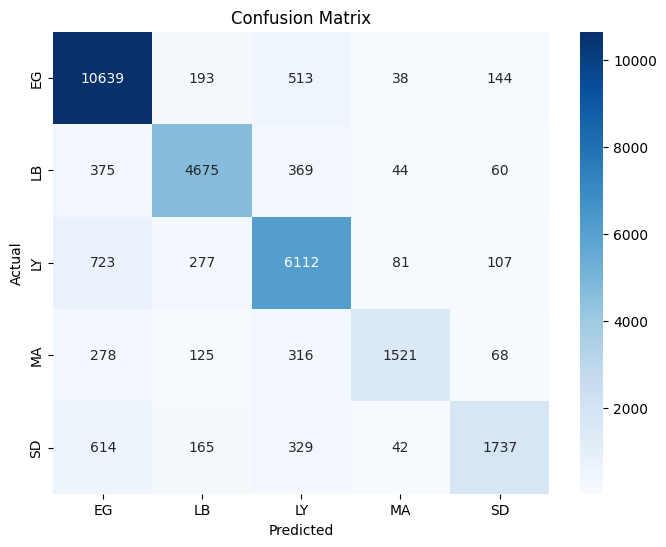

In [10]:
target_labels = ['EG', 'LB', 'LY', 'MA', 'SD']
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **LSTM Model**

In [11]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_transformed)
train_sequences = tokenizer.texts_to_sequences(train_transformed)
test_sequences = tokenizer.texts_to_sequences(test_transformed)
train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')

In [12]:
one_hot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = one_hot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(np.array(y_test).reshape(-1, 1))

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_padded, y_train_encoded, epochs=10, validation_data=(test_padded, y_test_encoded), batch_size=32)

C:\Users\marwa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
3694/3694 ━━━━━━━━━━━━━━━━━━━━ 719s 189ms/step - accuracy: 0.3893 - loss: 1.4619 - val_accuracy: 0.3902 - val_loss: 1.4532
Epoch 2/10
  40/3694 ━━━━━━━━━━━━━━━━━━━━ 12:41 208ms/step - accuracy: 0.3899 - loss: 1.4521

KeyboardInterrupt: 

In [14]:
predictions = model.predict(test_padded)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_encoded, axis=1)
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

# Save the trained model
model.save('deep_learning_model.h5')

924/924 ━━━━━━━━━━━━━━━━━━━━ 92s 98ms/step


Accuracy: 0.3901506177018108
